## Handwritten Digit Recognition Using SVM

GAMMA= 50 C= 0.5
Prediction: [3]


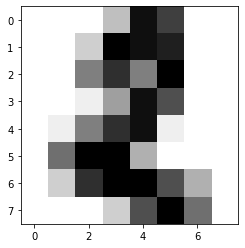

Prediction: [3]


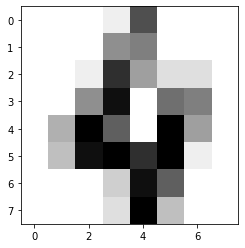

Prediction: [3]


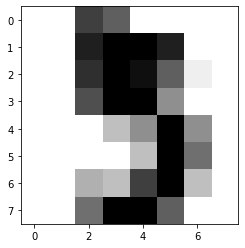

Prediction: [3]


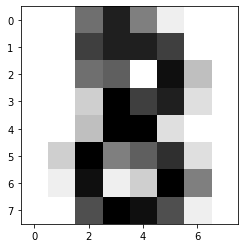

Prediction: [3]


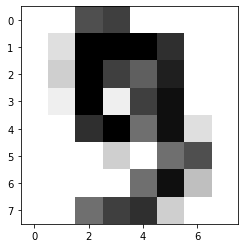

GAMMA= 5 C= 100
Prediction: [2]


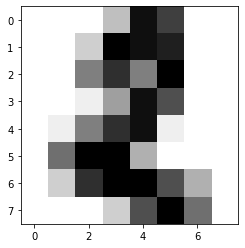

Prediction: [4]


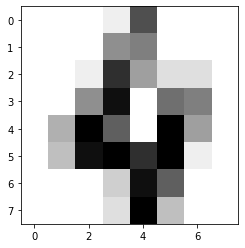

Prediction: [5]


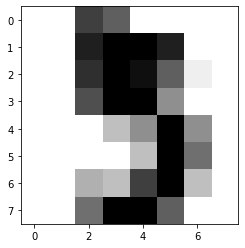

Prediction: [8]


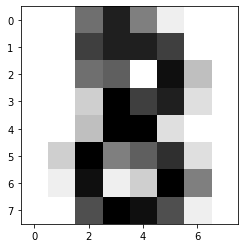

Prediction: [9]


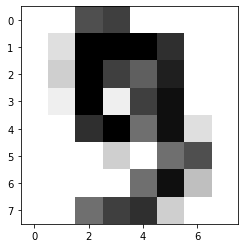

GAMMA= 0.005 C= 1000
Prediction: [2]


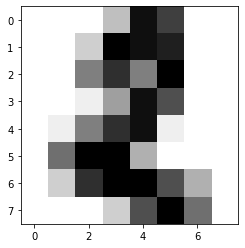

Prediction: [4]


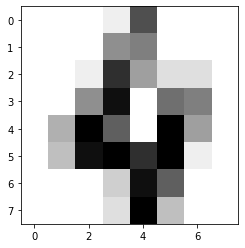

Prediction: [5]


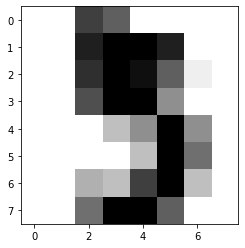

Prediction: [8]


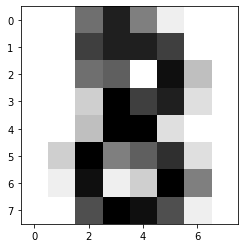

Prediction: [9]


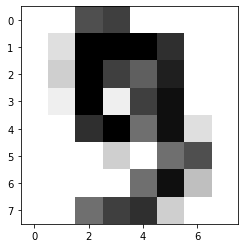

In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm

C=[0.5,100,1000]
gamma=[50,5,0.005]
d=[2,4,5,8,9]
digits = datasets.load_digits()
X, y = digits.data[:-1], digits.target[:-1]
for i in range(0,3):
    print("GAMMA=",gamma[i],"C=",C[i])
    classifier = svm.SVC(gamma=gamma[i], C=C[i])
    classifier.fit(X, y)
    print("======================================================")
    for j in range(0,5):
        print('Prediction:', classifier.predict(digits.data[d[j]].reshape(1,-1)))
        plt.imshow(digits.images[d[j]], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()

# Predicting Gender based upon name of a person

In [11]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

name1='abhishek'
name2= 'Karishma'
ans1 = classifier.classify(gender_features(name1))
ans2 = classifier.classify(gender_features(name2))

print(name1,"is:", ans1)
print(name2,"is:", ans2)

acc2 = nltk.classify.accuracy(classifier, test_set)
print("Accuracy is :",acc2)

abhishek is: male
Karishma is: female
Accuracy is : 0.744


## Selecting more accurate features to predict gender

In [12]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'Combination of Second last and last two letter': word[-2:]+word[-2]}
# gender_features('Shrek') = {'last_letter': 'k'}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#entries are    ({'last_letter': 'g'}, 'male')
train_set, test_set = featuresets[500:], featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

name1='abhishek'
name2= 'Karishma'
ans1 = classifier.classify(gender_features(name1))
ans2 = classifier.classify(gender_features(name2))

print(name1,"is:", ans1)
print(name2,"is:", ans2)

classifier.show_most_informative_features(5)
acc = nltk.classify.accuracy(classifier, test_set)
print("Accuracy is :",acc)

abhishek is: male
Karishma is: female
Most Informative Features
Combination of Second last and last two letter = 'nan'          female : male   =    100.3 : 1.0
Combination of Second last and last two letter = 'lal'          female : male   =     77.4 : 1.0
Combination of Second last and last two letter = 'iai'          female : male   =     40.6 : 1.0
Combination of Second last and last two letter = 'usu'            male : female =     38.3 : 1.0
Combination of Second last and last two letter = 'sas'          female : male   =     36.2 : 1.0
Accuracy is : 0.762


Text(0, 0.5, 'Accuracy')

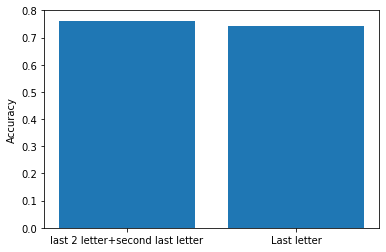

In [13]:
import matplotlib.pyplot as plt
plt.bar(['last 2 letter+second last letter','Last letter'],height=[acc,acc2])
plt.ylabel('Accuracy')